In [1]:
import os
import matplotlib.pyplot as plt

from Utils.visualization import *

### Experimento para Wiliam

In [2]:
def get_labels_and_props(path, patient):
    results = pd.read_csv(path)
    results = results[results['Sample_ids'] == patient]
    props = results['PK_props'].values
    
    print(np.mean(props))
    
    if round(np.mean(props)) == 0:
        print('Control')

    else:
        print('Parkinson')

get_labels_and_props('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv', 'P6')


0.7984883324074076
Parkinson


In [2]:
view_results('Results_v2/Note:AUDIO_VIDEO3D-1x1_noRFB_1head:weights-Lr:1e-05-Epoch:50-Exercise:Vowels-duration_size:False.csv')

Precision:0.5534, Recall:0.5429, F1-score:0.5481, Accuracy:0.5524, AUC:0.5673


In [4]:
view_results('Results_v2/Note:AUDIO_VIDEO3D-1x1_noRFB:weights-Lr:1e-05-Epoch:50-Exercise:Vowels-duration_size:False.csv')

Precision:0.4848, Recall:0.4571, F1-score:0.4706, Accuracy:0.4857, AUC:0.4647


In [4]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv'

data_words = audio_visual_evaluation(audio_path,
                                     video_path)

V:0.1 ; A:0.9 ; AUC:0.68
V:0.15 ; A:0.85 ; AUC:0.69
V:0.2 ; A:0.8 ; AUC:0.7
V:0.25 ; A:0.75 ; AUC:0.71
V:0.3 ; A:0.7 ; AUC:0.71
V:0.35 ; A:0.65 ; AUC:0.72
V:0.4 ; A:0.6 ; AUC:0.73
V:0.45 ; A:0.55 ; AUC:0.74
V:0.5 ; A:0.5 ; AUC:0.74
V:0.55 ; A:0.45 ; AUC:0.74
V:0.6 ; A:0.4 ; AUC:0.74
V:0.65 ; A:0.35 ; AUC:0.74
V:0.7 ; A:0.3 ; AUC:0.74
V:0.75 ; A:0.25 ; AUC:0.74
V:0.8 ; A:0.2 ; AUC:0.74
V:0.85 ; A:0.15 ; AUC:0.74
V:0.9 ; A:0.1 ; AUC:0.74


In [5]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv'

data_phonemes = audio_visual_evaluation(audio_path,
                                        video_path)

V:0.1 ; A:0.9 ; AUC:0.71
V:0.15 ; A:0.85 ; AUC:0.73
V:0.2 ; A:0.8 ; AUC:0.74
V:0.25 ; A:0.75 ; AUC:0.75
V:0.3 ; A:0.7 ; AUC:0.75
V:0.35 ; A:0.65 ; AUC:0.75
V:0.4 ; A:0.6 ; AUC:0.76
V:0.45 ; A:0.55 ; AUC:0.77
V:0.5 ; A:0.5 ; AUC:0.78
V:0.55 ; A:0.45 ; AUC:0.78
V:0.6 ; A:0.4 ; AUC:0.78
V:0.65 ; A:0.35 ; AUC:0.77
V:0.7 ; A:0.3 ; AUC:0.77
V:0.75 ; A:0.25 ; AUC:0.76
V:0.8 ; A:0.2 ; AUC:0.76
V:0.85 ; A:0.15 ; AUC:0.76
V:0.9 ; A:0.1 ; AUC:0.76


In [6]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv'

data_vowels = audio_visual_evaluation(audio_path,
                                      video_path)

V:0.1 ; A:0.9 ; AUC:0.71
V:0.15 ; A:0.85 ; AUC:0.71
V:0.2 ; A:0.8 ; AUC:0.7
V:0.25 ; A:0.75 ; AUC:0.69
V:0.3 ; A:0.7 ; AUC:0.69
V:0.35 ; A:0.65 ; AUC:0.68
V:0.4 ; A:0.6 ; AUC:0.67
V:0.45 ; A:0.55 ; AUC:0.66
V:0.5 ; A:0.5 ; AUC:0.64
V:0.55 ; A:0.45 ; AUC:0.63
V:0.6 ; A:0.4 ; AUC:0.61
V:0.65 ; A:0.35 ; AUC:0.59
V:0.7 ; A:0.3 ; AUC:0.58
V:0.75 ; A:0.25 ; AUC:0.56
V:0.8 ; A:0.2 ; AUC:0.53
V:0.85 ; A:0.15 ; AUC:0.51
V:0.9 ; A:0.1 ; AUC:0.49


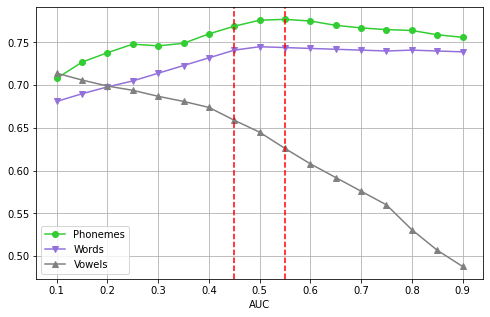

In [7]:
from matplotlib.lines import lineStyles

plt.figure(figsize=(8,5))
plt.plot(data_phonemes["Alphas"], data_phonemes["AUC"], 'o-', label="Phonemes", color = 'limegreen')
plt.plot(data_words["Alphas"]   , data_words["AUC"], 'v-', label="Words", color = "mediumpurple")
plt.plot(data_vowels["Alphas"]  , data_vowels["AUC"], '^-', label="Vowels", color="Gray")

plt.axvline(x=0.45, color="red", linestyle="--")
plt.axvline(x=0.55, color="red", linestyle="--")

plt.xlabel("Alphas")
plt.xlabel("AUC")
plt.grid()
plt.legend()
plt.savefig('Images/alpha_plot.pdf')

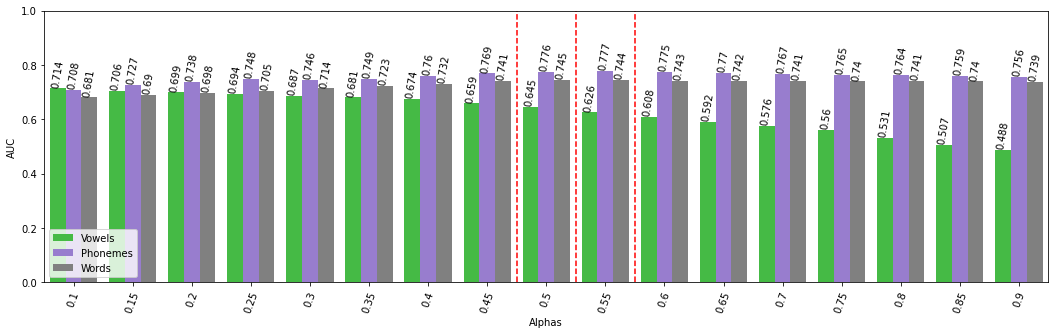

In [8]:
data_plot = {'AUC': [], 'Alphas':[], 'Exercises':[]}

for dic in [data_vowels, data_phonemes, data_words]:

    data_plot['AUC']   += dic['AUC']
    data_plot['Alphas'] += dic['Alphas']

data_plot['Exercises'] += ['Vowels' for idx in range(len(data_vowels['AUC']))]
data_plot['Exercises'] += ['Phonemes' for idx in range(len(data_phonemes['AUC']))]
data_plot['Exercises'] += ['Words' for idx in range(len(data_words['AUC']))]


plot_alpha(pd.DataFrame(data_plot), 'alpha_plot')

0.645 <class 'numpy.float64'>


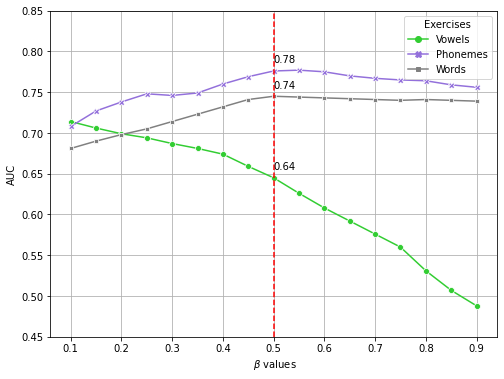

In [10]:
plt.figure(figsize=(8,6))

g = sns.lineplot(
    data=data_plot,
    x="Alphas", y="AUC", style="Exercises", hue="Exercises",
    markers=True, dashes=False, 
    palette=['limegreen', "mediumpurple", 'gray']
)
#plt.axvline(x=0.45, color="red", linestyle="--")
plt.axvline(x=0.5, color="red", linestyle="--")
plt.xlabel(r" $\beta $ values")
plt.ylim(0.45, 0.85)
plt.grid()

plt.text(0.5, data_plot["AUC"][8]+0.01, round(data_plot["AUC"][8], 2))
plt.text(0.5, data_plot["AUC"][25]+0.01, round(data_plot["AUC"][25], 2))
plt.text(0.5, data_plot["AUC"][42]+0.01, round(data_plot["AUC"][42], 2))
plt.savefig("Images/alpha_plot.pdf")

print(data_plot["AUC"][8], type(data_plot["AUC"][8]))


In [9]:
len(data_plot["AUC"])

51

# Words

Precision:0.6165, Recall:0.5529, F1-score:0.5830, Accuracy:0.6045, AUC:0.6542
Precision:0.7096, Recall:0.5688, F1-score:0.6314, Accuracy:0.6680, AUC:0.7135


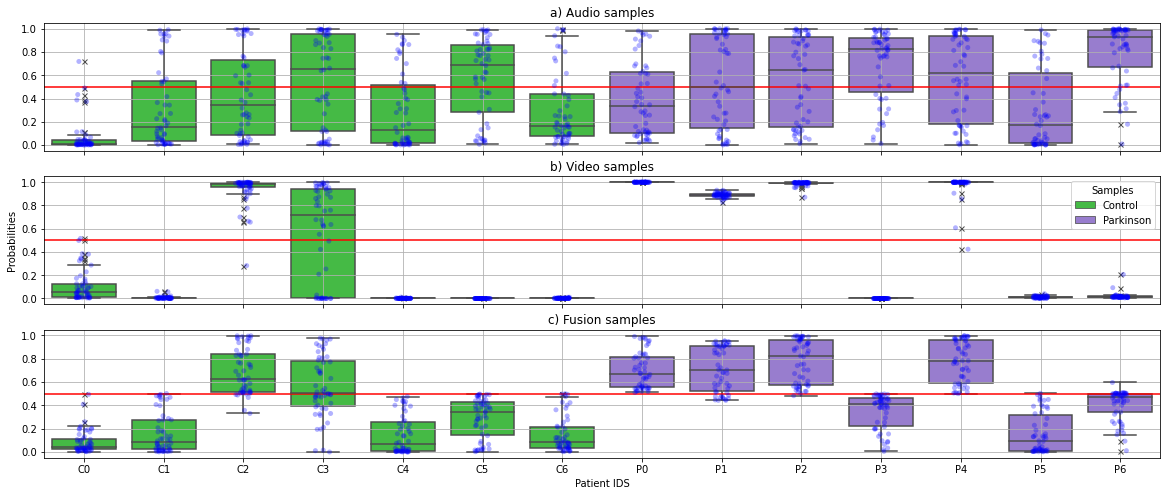

In [10]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv'
save_name  = 'Patients words'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

Petaca ok
C0 Petaca 1
C0 Petaca 3
C0 Petaca 2
C1 Petaca 1
C2 Petaca 1
C2 Petaca 2
C3 Petaca 3
C3 Petaca 1
C3 Petaca 2
C4 Petaca 1
C4 Petaca 2
C5 Petaca 3
C5 Petaca 1
C5 Petaca 2
C6 Petaca 2
C6 Petaca 1
C6 Petaca 3
P1 Petaca 1
P2 Petaca 1
P4 Petaca 1
P4 Petaca 2
P6 Petaca 2
P6 Petaca 3
P6 Petaca 1
Petaca bad
C1 Petaca 3
C1 Petaca 2
C2 Petaca 3
C4 Petaca 3
P0 Petaca 2
P0 Petaca 1
P0 Petaca 3
P1 Petaca 3
P1 Petaca 2
P2 Petaca 3
P2 Petaca 2
P3 Petaca 2
P3 Petaca 3
P3 Petaca 1
P4 Petaca 3
P5 Petaca 2
P5 Petaca 1
P5 Petaca 3
Bodega ok
C0 Bodega 2
C0 Bodega 1
C0 Bodega 3
C1 Bodega 1
C2 Bodega 1
C3 Bodega 2
C3 Bodega 3
C4 Bodega 1
C4 Bodega 3
C5 Bodega 2
C5 Bodega 1
C6 Bodega 2
C6 Bodega 3
C6 Bodega 1
P1 Bodega 3
P1 Bodega 1
P1 Bodega 2
P2 Bodega 3
P2 Bodega 1
P3 Bodega 2
P3 Bodega 3
P3 Bodega 1
P4 Bodega 1
P4 Bodega 2
P6 Bodega 3
P6 Bodega 2
P6 Bodega 1
Bodega bad
C1 Bodega 2
C1 Bodega 3
C2 Bodega 3
C2 Bodega 2
C3 Bodega 1
C4 Bodega 2
C5 Bodega 3
P0 Bodega 3
P0 Bodega 2
P0 Bodega 1
P2 Bodega 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Petaca'),
  Text(1, 0, 'Bodega'),
  Text(2, 0, 'Pato'),
  Text(3, 0, 'Apto'),
  Text(4, 0, 'Campana'),
  Text(5, 0, 'Presa'),
  Text(6, 0, 'Plato'),
  Text(7, 0, 'Acariciar'),
  Text(8, 0, 'Aplaudir'),
  Text(9, 0, 'Agarrar'),
  Text(10, 0, 'Dibujar'),
  Text(11, 0, 'Barco'),
  Text(12, 0, 'Bosque'),
  Text(13, 0, 'Ciudad'),
  Text(14, 0, 'Establo'),
  Text(15, 0, 'Hospital'),
  Text(16, 0, 'Luna'),
  Text(17, 0, 'Montaña')])

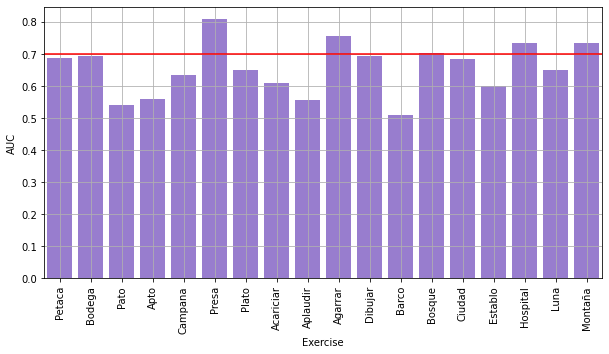

In [11]:
Exercises = ['Petaca', 'Bodega', 'Pato', 'Apto', 'Campana', 'Presa', 'Plato', 'Acariciar', 'Aplaudir', 'Agarrar', 'Dibujar', 'Barco', 'Bosque', 'Ciudad', 'Establo', 'Hospital', 'Luna', 'Montaña']
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv',
                             exercise,
                             'Audio',
                             aucs)
data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

f, axes = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple", axes=axes)
g.grid(0.2)
g.axhline(0.7, color='r')
plt.xticks(rotation=90)

Petaca ok
C0 Petaca 1
C0 Petaca 3
C0 Petaca 2
C1 Petaca 1
C1 Petaca 3
C1 Petaca 2
C4 Petaca 3
C4 Petaca 1
C4 Petaca 2
C5 Petaca 3
C5 Petaca 1
C5 Petaca 2
C6 Petaca 2
C6 Petaca 1
C6 Petaca 3
P0 Petaca 2
P0 Petaca 1
P0 Petaca 3
P1 Petaca 3
P1 Petaca 2
P1 Petaca 1
P2 Petaca 3
P2 Petaca 2
P2 Petaca 1
P4 Petaca 1
P4 Petaca 3
P4 Petaca 2
Petaca bad
C2 Petaca 1
C2 Petaca 3
C2 Petaca 2
C3 Petaca 3
C3 Petaca 1
C3 Petaca 2
P3 Petaca 2
P3 Petaca 3
P3 Petaca 1
P5 Petaca 2
P5 Petaca 1
P5 Petaca 3
P6 Petaca 2
P6 Petaca 3
P6 Petaca 1
Bodega ok
C0 Bodega 2
C0 Bodega 1
C0 Bodega 3
C1 Bodega 2
C1 Bodega 3
C1 Bodega 1
C3 Bodega 2
C3 Bodega 1
C4 Bodega 1
C4 Bodega 3
C4 Bodega 2
C5 Bodega 3
C5 Bodega 2
C5 Bodega 1
C6 Bodega 2
C6 Bodega 3
C6 Bodega 1
P0 Bodega 3
P0 Bodega 2
P0 Bodega 1
P1 Bodega 3
P1 Bodega 1
P1 Bodega 2
P2 Bodega 3
P2 Bodega 2
P2 Bodega 1
P4 Bodega 1
P4 Bodega 3
P4 Bodega 2
Bodega bad
C2 Bodega 3
C2 Bodega 2
C2 Bodega 1
C3 Bodega 3
P3 Bodega 2
P3 Bodega 3
P3 Bodega 1
P5 Bodega 2
P5 Bodega 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Petaca'),
  Text(1, 0, 'Bodega'),
  Text(2, 0, 'Pato'),
  Text(3, 0, 'Apto'),
  Text(4, 0, 'Campana'),
  Text(5, 0, 'Presa'),
  Text(6, 0, 'Plato'),
  Text(7, 0, 'Acariciar'),
  Text(8, 0, 'Aplaudir'),
  Text(9, 0, 'Agarrar'),
  Text(10, 0, 'Dibujar'),
  Text(11, 0, 'Barco'),
  Text(12, 0, 'Bosque'),
  Text(13, 0, 'Ciudad'),
  Text(14, 0, 'Establo'),
  Text(15, 0, 'Hospital'),
  Text(16, 0, 'Luna'),
  Text(17, 0, 'Montaña')])

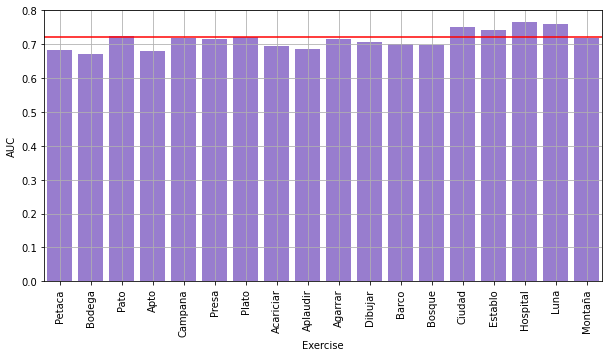

In [12]:
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix('Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv',
                             exercise,
                             'Video',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

print(aucs)
data_plot = pd.DataFrame(data_plot)

f, axes = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple", axes=axes)
g.grid(0.2)
g.axhline(0.72, color='r')
plt.xticks(rotation=90)

# Phonemes

Precision:0.6731, Recall:0.5556, F1-score:0.6087, Accuracy:0.6429, AUC:0.6644
Precision:0.7391, Recall:0.5397, F1-score:0.6239, Accuracy:0.6746, AUC:0.7506


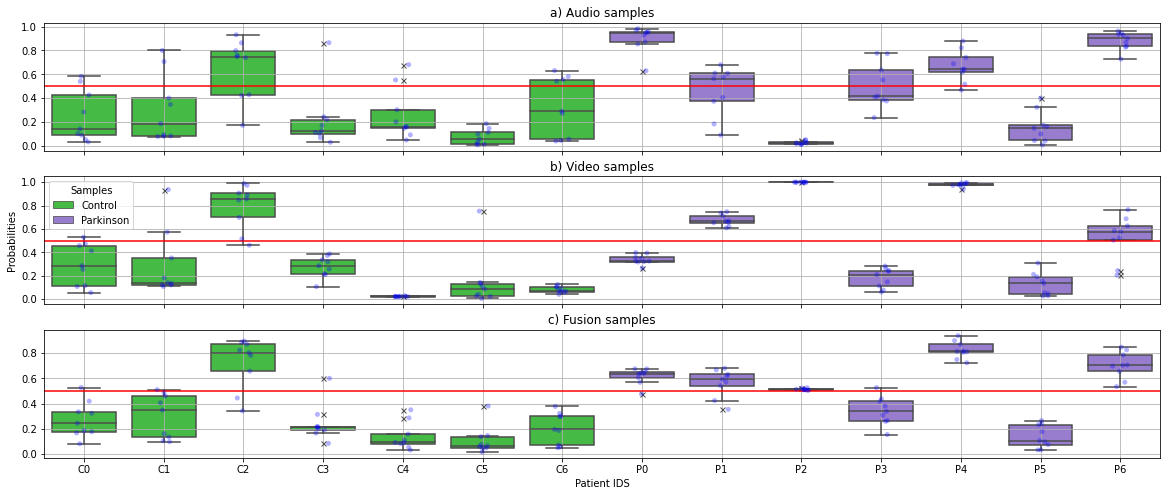

In [13]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
save_name  = 'Patients phonemes'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

Pataka ok
C0 Pataka 2
C0 Pataka 3
C0 Pataka 1
C1 Pataka 1
C1 Pataka 3
C1 Pataka 2
C2 Pataka 1
C3 Pataka 1
C3 Pataka 2
C3 Pataka 3
C4 Pataka 3
C4 Pataka 1
C4 Pataka 2
C5 Pataka 1
C5 Pataka 2
C5 Pataka 3
C6 Pataka 3
C6 Pataka 2
C6 Pataka 1
P0 Pataka 1
P0 Pataka 3
P0 Pataka 2
P1 Pataka 2
P1 Pataka 1
P1 Pataka 3
P3 Pataka 3
P4 Pataka 3
P4 Pataka 2
P4 Pataka 1
P6 Pataka 2
P6 Pataka 3
P6 Pataka 1
Pataka bad
C2 Pataka 2
C2 Pataka 3
P2 Pataka 2
P2 Pataka 1
P2 Pataka 3
P3 Pataka 2
P3 Pataka 1
P5 Pataka 3
P5 Pataka 1
P5 Pataka 2
Pakata ok
C0 Pakata 1
C0 Pakata 3
C1 Pakata 2
C1 Pakata 1
C2 Pakata 3
C2 Pakata 1
C3 Pakata 1
C3 Pakata 3
C3 Pakata 2
C4 Pakata 1
C5 Pakata 3
C5 Pakata 1
C5 Pakata 2
C6 Pakata 1
C6 Pakata 3
P0 Pakata 2
P0 Pakata 3
P0 Pakata 1
P1 Pakata 3
P3 Pakata 3
P4 Pakata 3
P4 Pakata 1
P6 Pakata 3
P6 Pakata 2
P6 Pakata 1
Pakata bad
C0 Pakata 2
C1 Pakata 3
C2 Pakata 2
C4 Pakata 3
C4 Pakata 2
C6 Pakata 2
P1 Pakata 1
P1 Pakata 2
P2 Pakata 3
P2 Pakata 2
P2 Pakata 1
P3 Pakata 1
P3 Pakata 

(array([0, 1, 2]),
 [Text(0, 0, 'Pataka'), Text(1, 0, 'Pakata'), Text(2, 0, 'Petaka')])

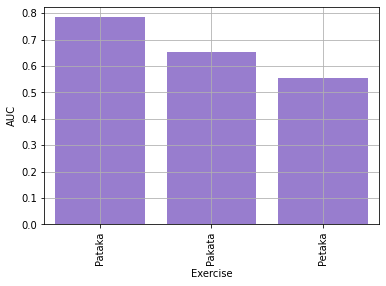

In [14]:
Exercises = ['Pataka', 'Pakata', 'Petaka']
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix(audio_path,
                             exercise,
                             'Audio',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

print(aucs)
data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

Pataka ok
C0 Pataka 2
C0 Pataka 3
C0 Pataka 1
C1 Pataka 3
C2 Pataka 1
C3 Pataka 1
C3 Pataka 2
C3 Pataka 3
C4 Pataka 3
C4 Pataka 1
C4 Pataka 2
C5 Pataka 2
C5 Pataka 3
C6 Pataka 3
C6 Pataka 2
C6 Pataka 1
P1 Pataka 2
P1 Pataka 1
P1 Pataka 3
P2 Pataka 2
P2 Pataka 1
P2 Pataka 3
P4 Pataka 3
P4 Pataka 2
P4 Pataka 1
P6 Pataka 2
Pataka bad
C1 Pataka 1
C1 Pataka 2
C2 Pataka 2
C2 Pataka 3
C5 Pataka 1
P0 Pataka 1
P0 Pataka 3
P0 Pataka 2
P3 Pataka 3
P3 Pataka 2
P3 Pataka 1
P5 Pataka 3
P5 Pataka 1
P5 Pataka 2
P6 Pataka 3
P6 Pataka 1
Pakata ok
C0 Pakata 1
C0 Pakata 2
C0 Pakata 3
C1 Pakata 2
C1 Pakata 1
C1 Pakata 3
C3 Pakata 1
C3 Pakata 3
C3 Pakata 2
C4 Pakata 1
C4 Pakata 3
C4 Pakata 2
C5 Pakata 3
C5 Pakata 1
C5 Pakata 2
C6 Pakata 1
C6 Pakata 3
C6 Pakata 2
P1 Pakata 1
P1 Pakata 3
P1 Pakata 2
P2 Pakata 3
P2 Pakata 2
P2 Pakata 1
P4 Pakata 3
P4 Pakata 1
P4 Pakata 2
P6 Pakata 3
P6 Pakata 2
P6 Pakata 1
Pakata bad
C2 Pakata 3
C2 Pakata 1
C2 Pakata 2
P0 Pakata 2
P0 Pakata 3
P0 Pakata 1
P3 Pakata 3
P3 Pakata 

(array([0, 1, 2]),
 [Text(0, 0, 'Pataka'), Text(1, 0, 'Pakata'), Text(2, 0, 'Petaka')])

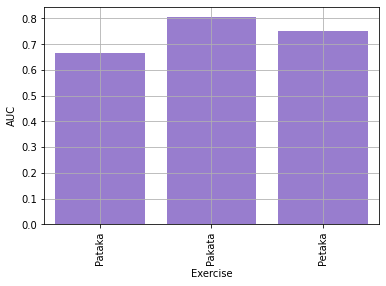

In [15]:
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix(video_path,
                             exercise,
                             'Video',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

print(aucs)
data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

# Vowels

Precision:0.8750, Recall:0.4000, F1-score:0.5490, Accuracy:0.6667, AUC:0.7156
Precision:0.4964, Recall:0.6571, F1-score:0.5656, Accuracy:0.4879, AUC:0.4500


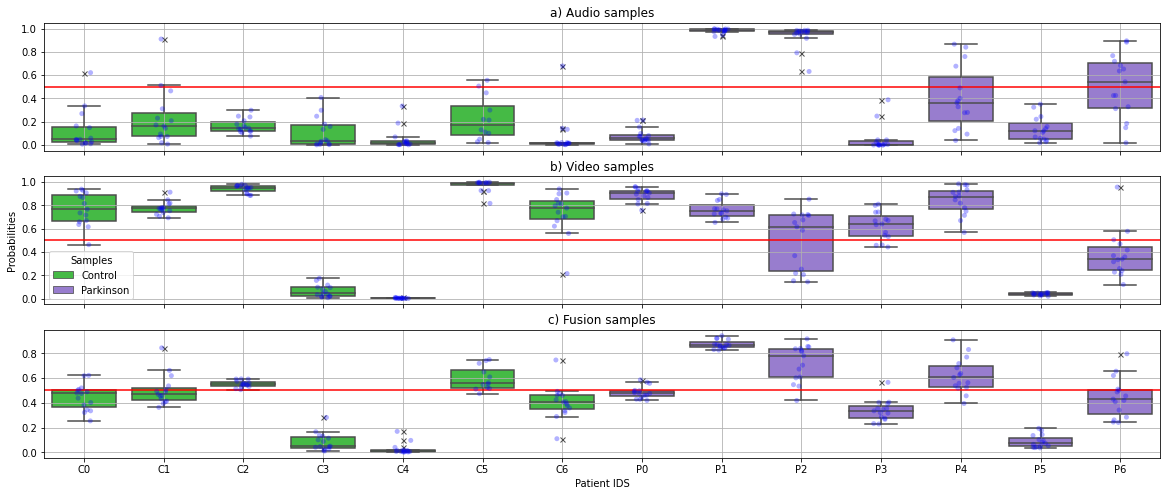

In [16]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv'
save_name  = 'Patients vowels'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

A ok
C0 A 1
C0 A 2
C0 A 3
C1 A 2
C1 A 1
C2 A 1
C2 A 3
C2 A 2
C3 A 1
C3 A 3
C3 A 2
C4 A 1
C4 A 3
C4 A 2
C5 A 3
C5 A 2
C6 A 3
C6 A 2
P1 A 3
P1 A 1
P1 A 2
P2 A 3
P2 A 1
P2 A 2
A bad
C1 A 3
C5 A 1
C6 A 1
P0 A 1
P0 A 2
P0 A 3
P3 A 2
P3 A 1
P3 A 3
P4 A 3
P4 A 1
P4 A 2
P5 A 1
P5 A 2
P5 A 3
P6 A 3
P6 A 2
P6 A 1
E ok
C0 E 3
C0 E 2
C0 E 1
C1 E 3
C1 E 1
C1 E 2
C2 E 1
C2 E 2
C2 E 3
C3 E 3
C3 E 2
C3 E 1
C4 E 1
C4 E 3
C4 E 2
C5 E 3
C5 E 2
C5 E 1
C6 E 2
C6 E 3
C6 E 1
P1 E 2
P1 E 3
P1 E 1
P2 E 1
P2 E 2
P2 E 3
P6 E 2
P6 E 3
E bad
P0 E 2
P0 E 3
P0 E 1
P3 E 2
P3 E 1
P3 E 3
P4 E 1
P4 E 3
P4 E 2
P5 E 2
P5 E 1
P5 E 3
P6 E 1
I ok
C0 I 2
C0 I 3
C1 I 2
C1 I 3
C2 I 2
C2 I 1
C2 I 3
C3 I 1
C3 I 3
C3 I 2
C4 I 3
C4 I 2
C4 I 1
C6 I 1
C6 I 2
C6 I 3
P1 I 2
P1 I 1
P1 I 3
P2 I 2
P2 I 1
P2 I 3
P4 I 2
P4 I 3
P6 I 2
P6 I 3
P6 I 1
I bad
C0 I 1
C1 I 1
P0 I 2
P0 I 1
P0 I 3
P3 I 3
P3 I 2
P3 I 1
P4 I 1
P5 I 2
P5 I 1
P5 I 3
O ok
C0 O 3
C0 O 1
C0 O 2
C1 O 1
C1 O 2
C1 O 3
C2 O 1
C2 O 3
C2 O 2
C3 O 2
C3 O 3
C3 O 1
C4 O 3
C4 O 2
C4 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'E'),
  Text(2, 0, 'I'),
  Text(3, 0, 'O'),
  Text(4, 0, 'U')])

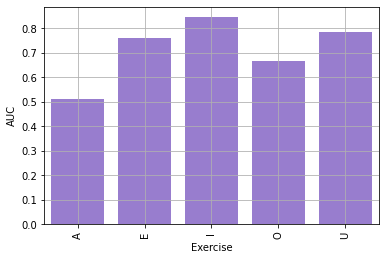

In [17]:
Exercises = ['A', 'E', 'I', 'O', 'U']
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix(audio_path,
                             exercise,
                             'Audio',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

A ok
C3 A 1
C3 A 3
C3 A 2
C4 A 1
C4 A 3
C4 A 2
P0 A 1
P0 A 2
P0 A 3
P1 A 3
P1 A 1
P1 A 2
P2 A 3
P2 A 2
P3 A 1
P3 A 3
P4 A 3
P4 A 1
P4 A 2
A bad
C0 A 1
C0 A 2
C0 A 3
C1 A 2
C1 A 1
C1 A 3
C2 A 1
C2 A 3
C2 A 2
C5 A 1
C5 A 3
C5 A 2
C6 A 3
C6 A 1
C6 A 2
P2 A 1
P3 A 2
P5 A 1
P5 A 2
P5 A 3
P6 A 3
P6 A 2
P6 A 1
E ok
C3 E 3
C3 E 2
C3 E 1
C4 E 1
C4 E 3
C4 E 2
P0 E 2
P0 E 3
P0 E 1
P1 E 2
P1 E 3
P1 E 1
P2 E 2
P3 E 2
P3 E 1
P3 E 3
P4 E 1
P4 E 3
P4 E 2
E bad
C0 E 3
C0 E 2
C0 E 1
C1 E 3
C1 E 1
C1 E 2
C2 E 1
C2 E 2
C2 E 3
C5 E 3
C5 E 2
C5 E 1
C6 E 2
C6 E 3
C6 E 1
P2 E 1
P2 E 3
P5 E 2
P5 E 1
P5 E 3
P6 E 2
P6 E 1
P6 E 3
I ok
C3 I 1
C3 I 3
C3 I 2
C4 I 3
C4 I 2
C4 I 1
P0 I 2
P0 I 1
P0 I 3
P1 I 2
P1 I 1
P1 I 3
P2 I 3
P3 I 3
P3 I 2
P4 I 2
P4 I 3
P4 I 1
I bad
C0 I 1
C0 I 2
C0 I 3
C1 I 2
C1 I 1
C1 I 3
C2 I 2
C2 I 1
C2 I 3
C6 I 1
C6 I 2
C6 I 3
P2 I 2
P2 I 1
P3 I 1
P5 I 2
P5 I 1
P5 I 3
P6 I 2
P6 I 3
P6 I 1
O ok
C3 O 2
C3 O 3
C3 O 1
C4 O 3
C4 O 2
C4 O 1
C6 O 1
P0 O 3
P0 O 2
P0 O 1
P1 O 1
P1 O 2
P1 O 3
P2 O 1
P2 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'E'),
  Text(2, 0, 'I'),
  Text(3, 0, 'O'),
  Text(4, 0, 'U')])

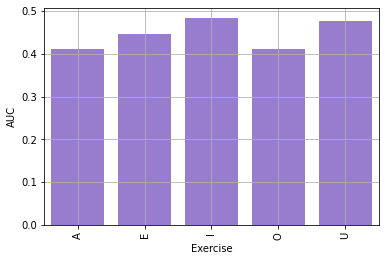

In [18]:
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix(video_path,
                             exercise,
                             'Video',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

In [19]:
audio_visual_evaluation(audio_path,
                        video_path,
                        'vowels-alpha')

TypeError: audio_visual_evaluation() takes 2 positional arguments but 3 were given

In [ ]:
import pandas  as pd
import seaborn as sns
import numpy   as np

import matplotlib.pyplot as plt

video = pd.read_csv('Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv')
video = video[video['Sample_ids'] == 'C1']
audio = pd.read_csv('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv')
audio = audio[audio['Sample_ids'] == 'C1']

video = video['PK_props'].values.reshape(9,1)
audio = audio['PK_props'].values.reshape(9,1)
fusion =list(np.mean((video, audio), axis=0)[:,0])

video = list(video[:,0])
audio = list(audio[:,0])

video_l, audio_l, fusion_l = [], [], []
for i in range(9):
    video_l.append('Video')
    audio_l.append('Audio')
    fusion_l.append('Fusion')

data = pd.DataFrame({'Probability': audio + video + fusion,
                    'Modality': audio_l + video_l + fusion_l})

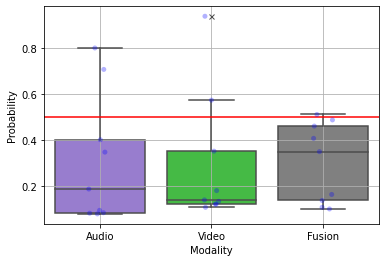

In [ ]:
sns.stripplot(x = 'Modality', y = 'Probability', data=data, marker="o", alpha=0.3, color="blue")
g = sns.boxplot(x = 'Modality', y = 'Probability', data=data, palette=["mediumpurple", 'limegreen', 'grey'], dodge=False, flierprops={"marker": "x"})
g.axhline(0.5, color='r')
g.grid(0.2)
plt.savefig('Images/{}.pdf'.format('Fusion exmaple'))